# Decision Tree(決策樹)


decision tree是一種非常容易理解也具有強解釋性的一種機器學習演算法，其透過資訊增益方式進行訓練，對於資料並不需要做標準化或一般化就能進行訓練得到很好的效果，因此非常被廣泛的應用在社會科學中，作為一種系統化決策的重要工具。

decision tree是一種非常強的演算法，可以透過加深分支的方式輕鬆擬合複雜的資料集，也因此非常容易產生過擬合的現象，實務上我們會透過增加深度的懲罰機制限制樹的生長、或剪枝減少過擬合的問題。

實務上decision tree可以應用在分類或者回歸的任務。




# 分類樹

分類樹可以說是最常被應用的一種決策樹，傳統上我們使用information gain來作為分類樹的依據。而使用inforamtion gain我們需要一個能夠把資訊量化的方式才能做評估，在決策樹資訊的量化我們習慣用information entropy或gini inpurity。


### gini impurity(吉尼不純度):

## 公式: 

## $$Gini\ Impurity = 1 - \sum_{i=1}^{k} p_i^2$$

gini impurity是一種很簡單易懂的思維，假設我們有一些資料她總共有三類別其資料分布如下(0, 5, 45)，那麼他的gini impurity:

### $$gini\ impurity = 1 - (\frac{0}{50})^2 - (\frac{5}{50})^2 - (\frac{45}{50})^2 = 0.18$$

所以我們可以發現當資料都是同一類也就是純化時(0,3,0)，gini impurity = 0。


### information entropy(信息熵):

entropy是一種概念最初在熱力學中提中表達一種狀態的改變，在自然界中我們能夠觀察到事物會自發地由一個狀態跳至另一個狀態，物理學家假設界界上有一種物理量叫做entropy，在孤立系統中，當entropy增加至某種程度事物就會從A狀態自發的跳往B狀態。而什麼是自發呢?就是狀態從微觀態少移動至微觀態多的狀態，按照統計學角度就是往常態或平均值移動。

夏農基於此想法提出了information entropy，夏農認為不確定度低的不需要多做說明也就是信息量低，不確定度高的需要詳加解釋也就是信息量高，以統計學角度就是機率分布越平均信息量越高，機率分布越不平均信息量越低，**熵表達了整個系統的平均訊息量**，這就是所謂的information entropy。

## $$information\ entropy = -\sum_{i=1}^k(p_i)*log(p_i)$$


假設我們有一些資料她總共有三類別其資料分布如下(0, 5, 45)，那麼他的information entropy:


### $$information\ entropy = -0*log(0) - (0.1)*log(0.1) - (0.9)*log(0.9) =  0.325$$

### information gain(資訊增益)

從上面我們可以知道資訊量的變化與不確定度掛勾，當我們把某個事件不確定度大幅降低的時候，entropy會大幅度的下降好像被劫走了一般，這就是所謂的information gain。在決策樹中我們會以每次前後狀態比較找出最大的information gain進行決策降低entropy直至0。

## $$information\ gain = -(entropy_{after} - entropy_{before})$$


### 範例:

![](imgs/c45.png)


# CART Algorithm

CART全名叫 classification and regression tree，是一種可以做分類也可以做回歸的2元決策樹，也是一種貪婪演算法，每次尋找最優分裂然後進入下一層一直重複此過程。最優分裂會先遍歷所有資料找出每個特徵的最佳閥值，再比較哪個特徵的最佳閥值為最優分裂。

在分類樹上我們會用Cost function的方式進行分類，回歸樹則是以最小二乘法方式進行分類。


原則上cost function的設計還是以gini impurity或information entropy為主，gini impurity為cost function的樹計算上會略快一些，傾向於先分支出樣本較多的類別，而information entropy較傾向於產生更平衡的決策樹。


### Gini:

### $$Cost = \frac{m_{left}}{m} * Gini_{left} + \frac{m_{right}}{m} * Gini_{right} $$

### information entropy:

### $$Cost = entropy_{left} + entropy_{right}$$


### 範例:

以iris資料集為例

![](imgs/dt.jpg)

In [1]:
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
Y = iris.target

print(X[:3])
print(Y[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0]


In [2]:
# DecisionTreeClassifier
# 
#
# DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
#                        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
#                        max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
#                        min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
#
# Parameter:
# criterion{“gini”, “entropy”}, default=”gini”
# splitter{“best”, “random”}, default=”best”
# max_depthint, default=None
# random_stateint or RandomState, default=None
#
# 說明: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# 原始碼: https://github.com/scikit-learn/scikit-learn/blob/95d4f0841/sklearn/tree/_classes.py#L585


from sklearn.tree import DecisionTreeClassifier


net = DecisionTreeClassifier()
net.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

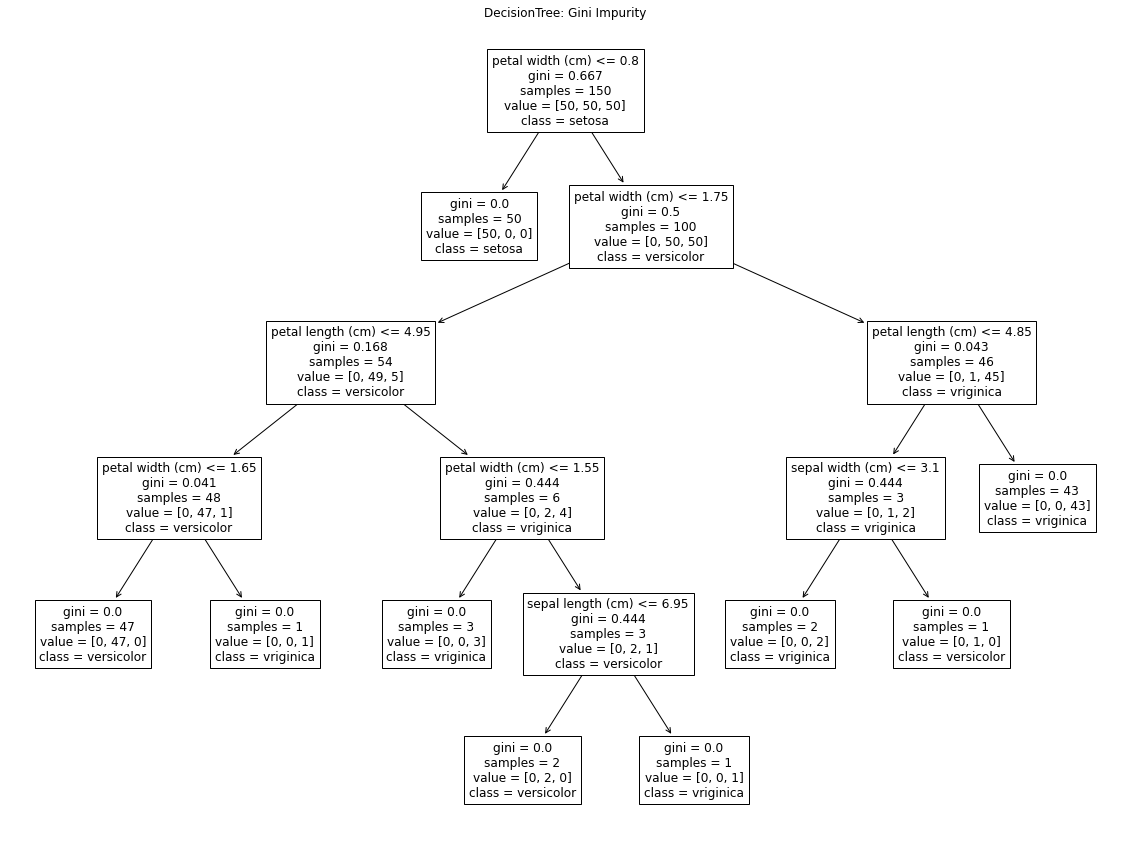

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(net, feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)', 'petal width (cm)'],
          class_names=['setosa', 'versicolor', 'vriginica'])
plt.title('DecisionTree: Gini Impurity')
plt.show()

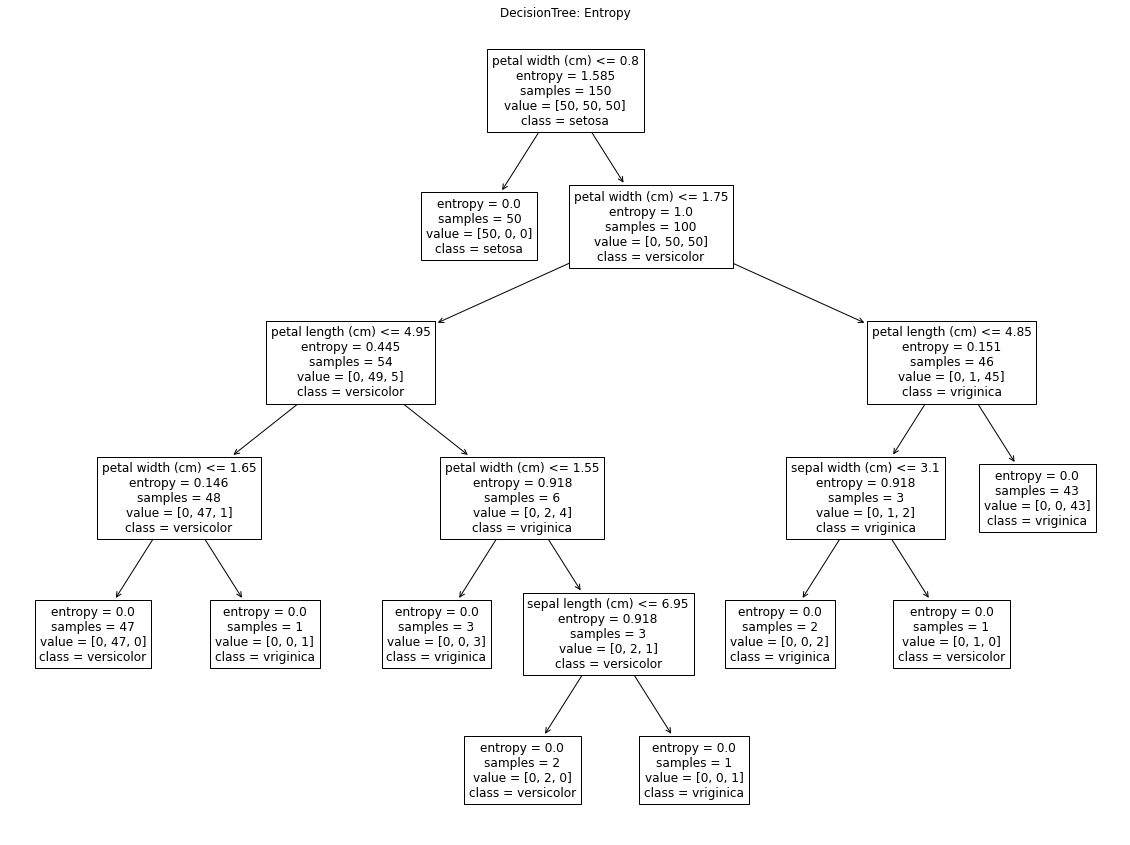

In [4]:
net = DecisionTreeClassifier(criterion='entropy')
net.fit(X, Y)
plt.figure(figsize=(20, 15))
plot_tree(net, feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)', 'petal width (cm)'],
          class_names=['setosa', 'versicolor', 'vriginica'])
plt.title('DecisionTree: Entropy')
plt.show()